In [5]:
# import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import PIL
import shutil
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from zipfile import ZipFile

In [1]:
# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))
  
# # Then move kaggle.json into the folder where the API expects to find it.
# !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [6]:
# !kaggle datasets download mbkinaci/fruit-images-for-object-detection

In [7]:
# ZipFile('fruit-images-for-object-detection.zip', 'r').extractall()

In [11]:
class_names = ['apple', 'banana', 'mixed', 'orange']
main_dataset_path = 'Datasets/fruits-object-detection/'
train_path = main_dataset_path + 'train_zip/train/'
test_path = main_dataset_path + 'test_zip/test/'

In [14]:
# create class folders

try:
    for name in class_names:
        class_train_path = os.path.join(train_path, name)
        class_test_path = os.path.join(test_path, name)
        os.mkdir(class_train_path)
        os.mkdir(class_test_path)

    # move image files to respective class folder
    for base_path in [train_path, test_path]:
        for filename in os.listdir(base_path):
            if ('.' in filename):
                if (filename.split('.')[1] == 'jpg'):
                    filename_class = filename.split('_')[0]
                    source = os.path.join(base_path, filename)
                    destination = os.path.join(base_path, filename_class, filename)
                    shutil.move(source, destination)
except FileExistsError:
    print('Folder(s) already exist!')
          # else:
      #   source = os.path.join(base_path, filename)
      #   os.remove(source)

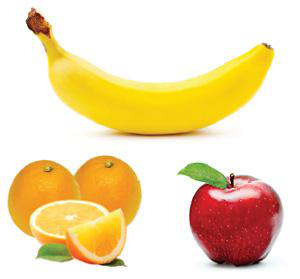

In [37]:
fruit_sample = tf.keras.preprocessing.image.load_img(
    'Datasets/fruits-object-detection/train_zip/train/mixed/mixed_19.jpg'
)
image_height, image_width = tf.keras.preprocessing.image.img_to_array(fruit_sample).shape[:2]
batch_size=32

fruit_sample

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=batch_size
)

val_generator = val_datagen.flow_from_directory(
    test_path,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=batch_size
)

Found 240 images belonging to 4 classes.
Found 60 images belonging to 4 classes.


In [26]:
model = tf.keras.models.Sequential([
  layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(128, (3,3), activation='relu'),
  layers.MaxPooling2D(2,2),
  # layers.Conv2D(128, (3,3), activation='relu'),
  # layers.MaxPooling2D(2,2),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(512, activation='relu'),
  layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [27]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [28]:
tf.random.set_seed(22)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

Epoch 1/50


2021-11-02 09:55:11.430240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/PIL/Image.py:973: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 [==============================] - ETA: 0s - loss: 5.2929 - accuracy: 0.3083

2021-11-02 09:55:14.020770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 3s 356ms/step - loss: 5.2929 - accuracy: 0.3083 - val_loss: 1.3084 - val_accuracy: 0.3000
Epoch 2/50
8/8 [==============================] - 3s 348ms/step - loss: 1.3097 - accuracy: 0.3958 - val_loss: 1.1635 - val_accuracy: 0.3667
Epoch 3/50
8/8 [==============================] - 3s 320ms/step - loss: 1.2380 - accuracy: 0.3792 - val_loss: 1.1473 - val_accuracy: 0.6500
Epoch 4/50
8/8 [==============================] - 3s 330ms/step - loss: 1.1348 - accuracy: 0.5667 - val_loss: 0.8599 - val_accuracy: 0.6667
Epoch 5/50
8/8 [==============================] - 3s 338ms/step - loss: 1.0129 - accuracy: 0.6083 - val_loss: 0.8133 - val_accuracy: 0.5833
Epoch 6/50
8/8 [==============================] - 3s 321ms/step - loss: 1.0041 - accuracy: 0.5792 - val_loss: 0.7008 - val_accuracy: 0.7667
Epoch 7/50
8/8 [==============================] - 3s 317ms/step - loss: 0.8412 - accuracy: 0.6833 - val_loss: 0.6152 - val_accuracy: 0.8333
Epoch 8/50
8/8 [===============

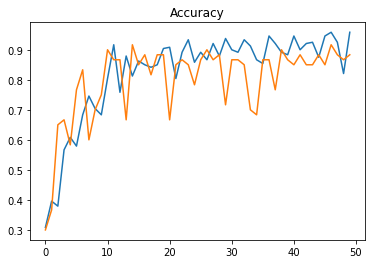

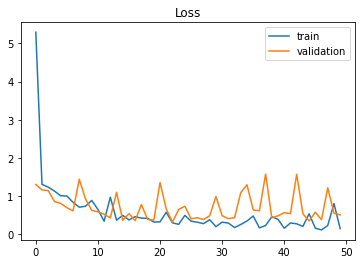

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='train')
plt.plot(epochs, val_acc, label='validation')
plt.title('Accuracy')
plt.figure()

plt.plot(epochs, loss, label='train')
plt.plot(epochs, val_loss, label='validation')
plt.title('Loss')
plt.legend()
plt.show()

In [24]:
# train_generator.class_indices.keys()
list(train_generator.class_indices.keys())[0]

'apple'

In [25]:
# import numpy as np

# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for file_name in uploaded.keys():
#   path = '/content/' + file_name
#   img = image.load_img(path, target_size=(150,150))

#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)
#   images = np.vstack([x])

#   classes = model.predict(images, batch_size=10)
#   predicted_class_ix = np.argmax(classes[0])
#   print('Predicted: ', list(train_generator.class_indices.keys())[predicted_class_ix])

In [ ]:
# labels_train = []
# labels_test = []

# img_path_train = []
# img_path_test = []

# train_path = 'train_zip/train/'
# test_path = 'test_zip/test/'

# for filename in os.listdir(train_path):
#   if (filename.split('.')[1] == 'jpg'):
#     labels_train.append(filename.split('_')[0])
#     img_path_train.append(os.path.join(train_path, filename))

# for filename in os.listdir(test_path):
#   if (filename.split('.')[1] == 'jpg'):
#     labels_test.append(filename.split('_')[0])
#     img_path_test.append(os.path.join(test_path, filename))

In [ ]:
# np.unique(np.array(labels_train))

In [ ]:
# PIL.Image.open(img_path_train[100])

In [ ]:
# X_train = []

# for path in img_path_train:
#   img = cv2.imread(path)
#   X_train.append(img)

# X_train = np.array(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


In [ ]:
# X_test = []

# for path in img_path_test:
#   img = cv2.imread(path)
#   X_test.append(img)

# X_test = np.array(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


In [ ]:
# img = cv2.imread(img_path_train[0])
# cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
sample_annot = 'train_zip/train/'

'apple_18.xml'

In [ ]:
train_path

'train_zip/train/'

In [31]:
with open('Datasets/fruits-object-detection/train_zip/train/apple_1.xml') as annot_file:
    print(''.join(annot_file.readlines()))

<annotation>
	<folder>train</folder>
	<filename>apple_1.jpg</filename>
	<path>C:\tensorflow1\models\research\object_detection\images\train\apple_1.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>0</width>
		<height>0</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>apple</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>8</xmin>
			<ymin>15</ymin>
			<xmax>331</xmax>
			<ymax>349</ymax>
		</bndbox>
	</object>
</annotation>



In [34]:
from xml.etree import ElementTree as ET

tree = ET.parse('Datasets/fruits-object-detection/train_zip/train/apple_11.xml')
root = tree.getroot()

sample_annot = []

for neighbor in root.iter('bndbox'):
    xmin = int(neighbor.find('xmin').text)
    ymin = int(neighbor.find('ymin').text)
    xmax = int(neighbor.find('xmax').text)
    ymax = int(neighbor.find('ymax').text)

    sample_annot.append([xmin, ymin, xmax, ymax])

print(sample_annot)

[[213, 33, 459, 258], [1, 30, 188, 280], [116, 5, 337, 220]]


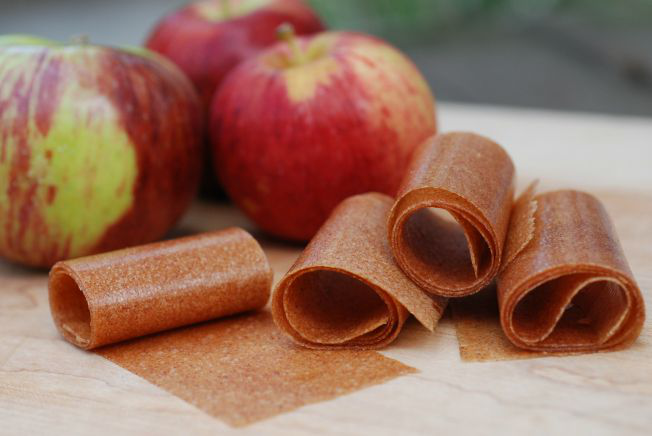

In [35]:
from PIL import Image, ImageDraw

sample_image = Image.open('Datasets/fruits-object-detection/train_zip/train/apple/apple_11.jpg')
sample_image

[213, 33, 459, 258]
[1, 30, 188, 280]
[116, 5, 337, 220]


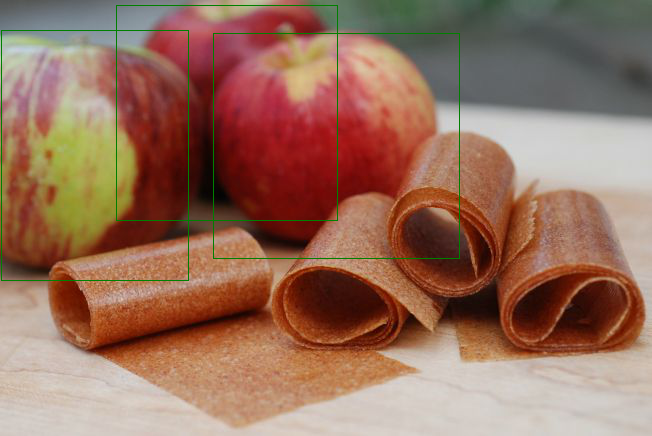

In [36]:
sample_image_annotated = sample_image.copy()

img_bndbox = ImageDraw.Draw(sample_image_annotated)

for bndbox in sample_annot:
    print(bndbox)
    img_bndbox.rectangle(bndbox, outline='green')

sample_image_annotated

## Object Detection

In [ ]:
# TODO: get bounded box for every image

# iterate through every xml file 

In [44]:
train_generator